In [51]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from custom_inference import (read_config_file, build_net_v2, generate_anchors, read_kitti_info_file,
                              load_point_cloud, voxel_generator_v2, detection_v2, visualize)
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 36,12 # set the size of graph

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[  41 2000 2000]


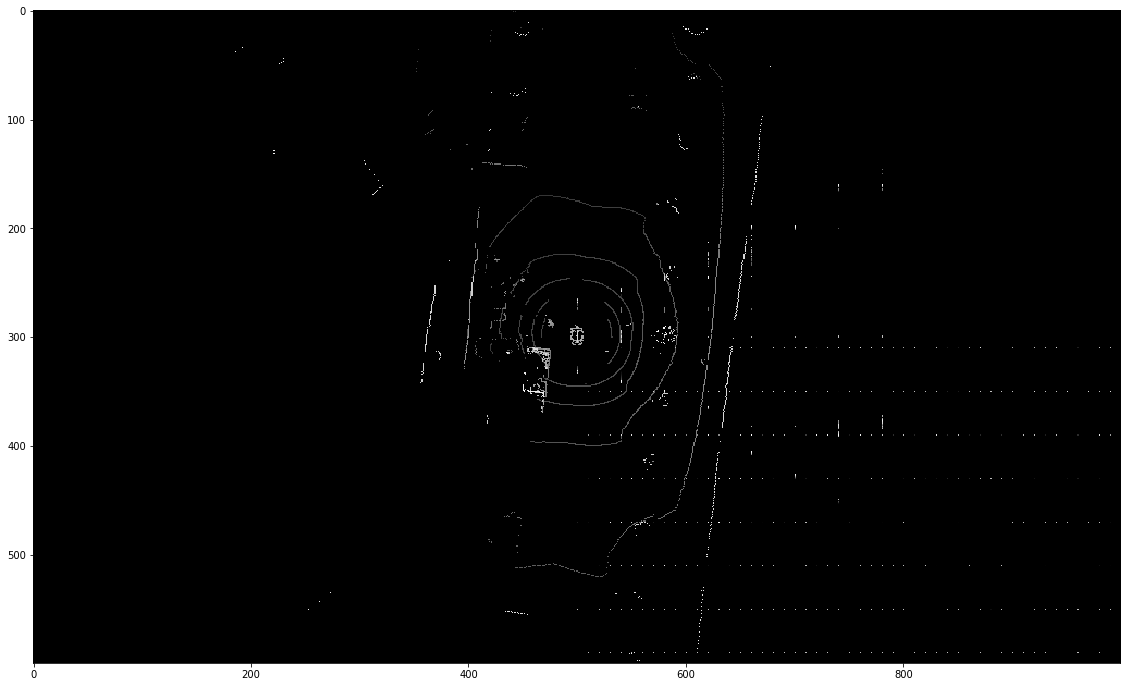

In [52]:
config_path = "./model_truck_1_epoch/pipeline.config"
ckpt_path = "./model_truck_1_epoch/voxelnet-464.tckpt"

input_cfg, model_cfg, device = read_config_file(config_path)
target_assigner, voxel_generator, device, net = build_net_v2(ckpt_path, model_cfg, device)
anchors = generate_anchors(voxel_generator, target_assigner, model_cfg, device)
infos, root_path = read_kitti_info_file(input_cfg)  
points, info = load_point_cloud(infos, 23, root_path)
coords, voxels, num_points = voxel_generator_v2(points, voxel_generator, device)
pred = detection_v2(anchors, voxels, num_points, coords, net)
bev_map = visualize(pred, points)

plt.imshow(bev_map)
plt.show()

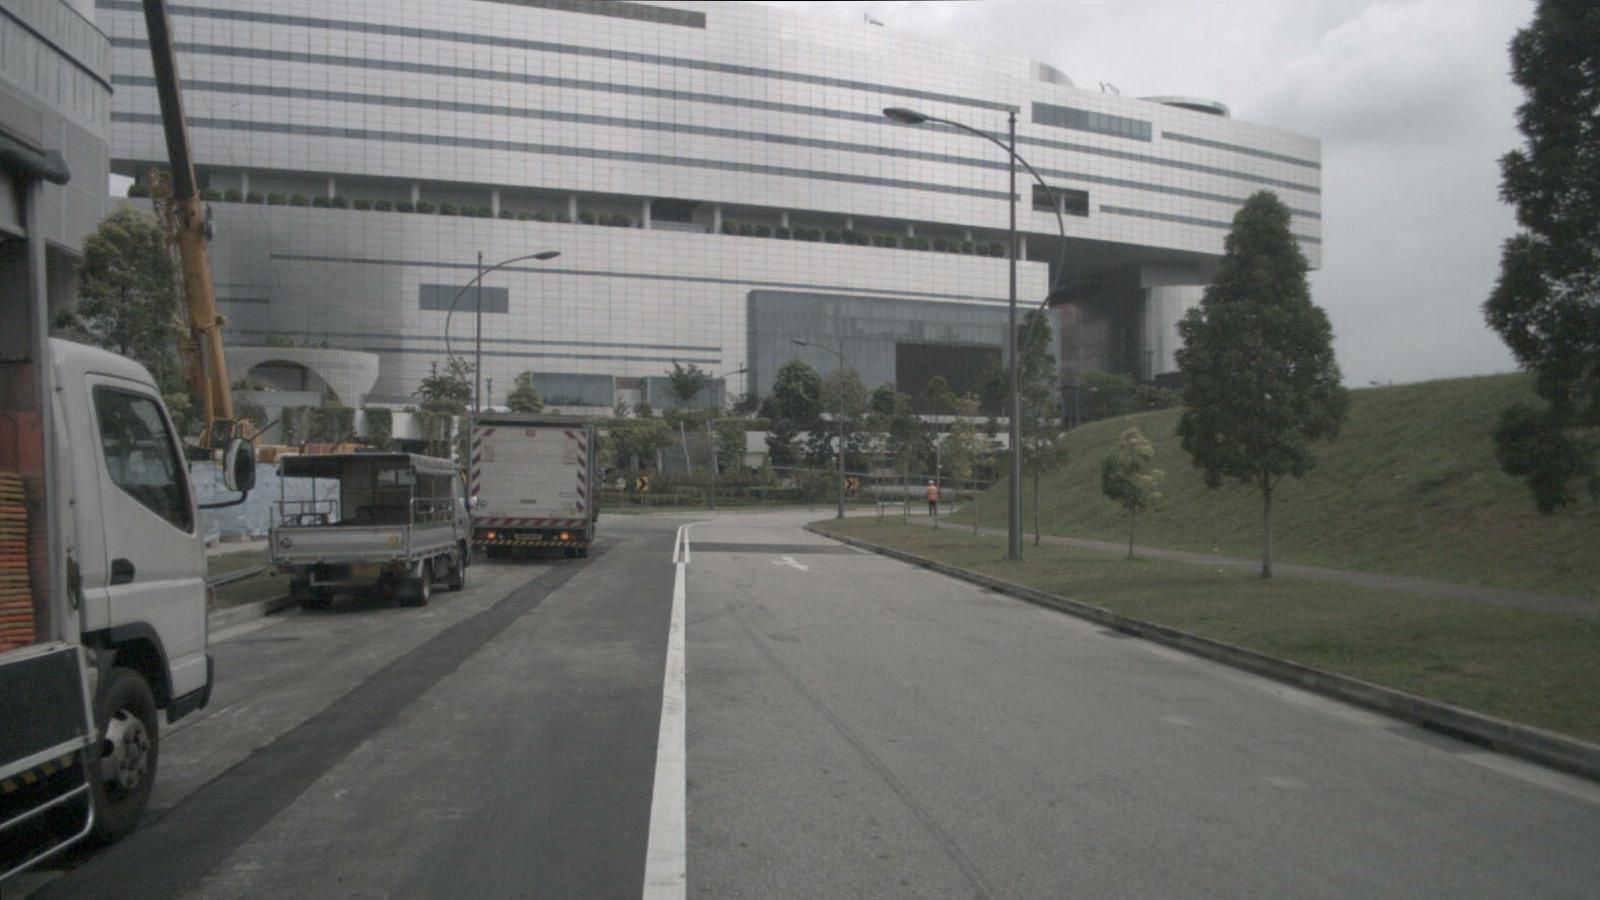

In [53]:
Image(filename=info['cam_front_path'], width=1000, height=100)